<a href="https://colab.research.google.com/github/Satyshi2015/chronic_kidney_analysis/blob/main/Chronic_Kidney_withoutcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [4]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading dataset
chronic_df = pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal)
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)
		  rc in millions/cmm
- 	19.Hypertension(nominal)
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)
		  class - (ckd,notckd)

In [6]:
# checking info of columns and null values
chronic_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [7]:
# drop id column
chronic_df = chronic_df.drop('id',axis=1)



In [8]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [10]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
chronic_df[['specific_gravity','albumin','sugar']]=chronic_df[['specific_gravity','albumin','sugar']].astype('object')





In [11]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume']=pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
chronic_df['white_blood_cell_count']=pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count']=pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [12]:
# Extracting categorical and numerical columns

cat_cols = [col for col in chronic_df.columns if chronic_df[col].dtype=='object']
num_cols = [col for col in chronic_df.columns if chronic_df[col].dtype!='object']


In [13]:
# by looping & looking at unique values in categorical columns

for col in cat_cols:
  print(f"{col} has {chronic_df[col].unique()} values\n")




specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [14]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols

chronic_df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace=True)


In [15]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class']=chronic_df['class'].map({'ckd':0,'notckd':1})



# coverting target col into numeric to check correlation

chronic_df['class']=pd.to_numeric(chronic_df['class'],errors='coerce')


In [16]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [17]:
# let's see the cols in numerical col list,class column will be missing from here

num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

<Figure size 2000x1200 with 0 Axes>

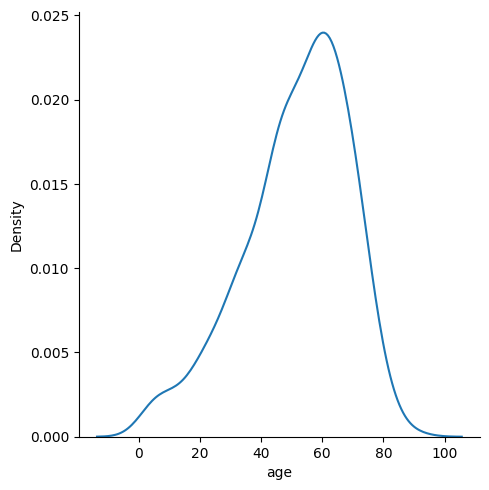

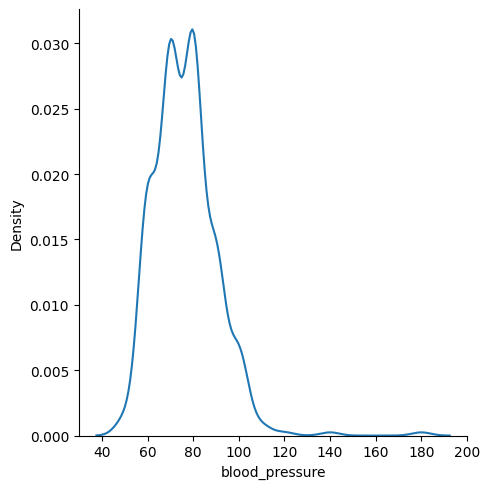

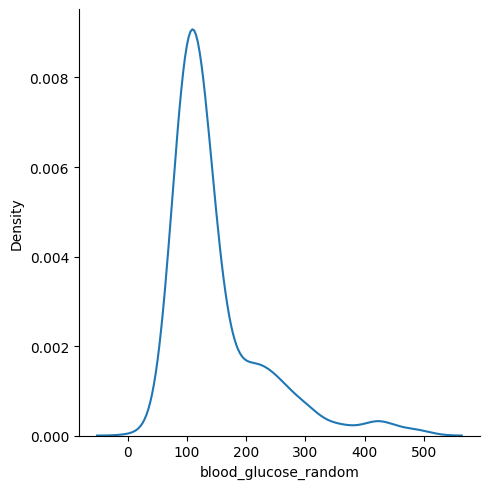

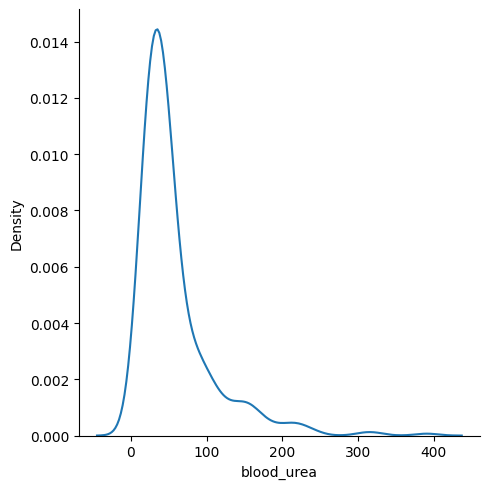

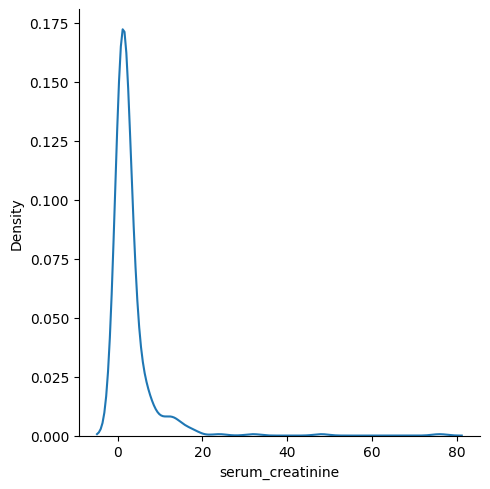

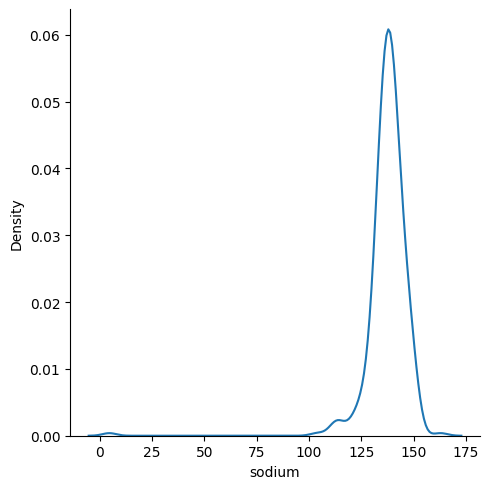

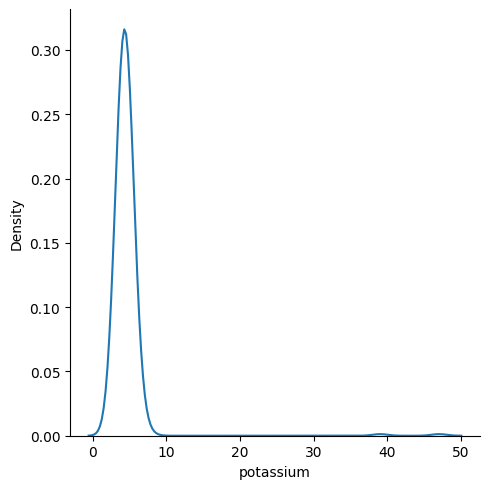

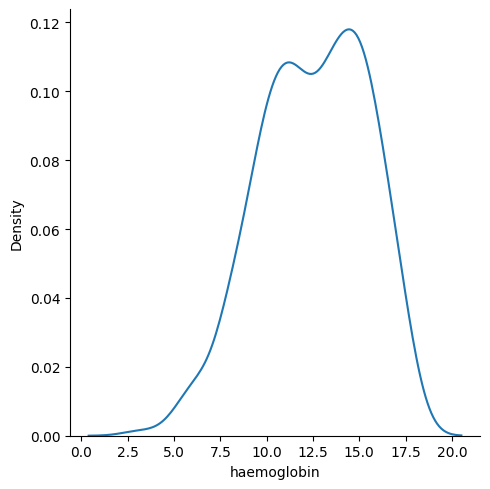

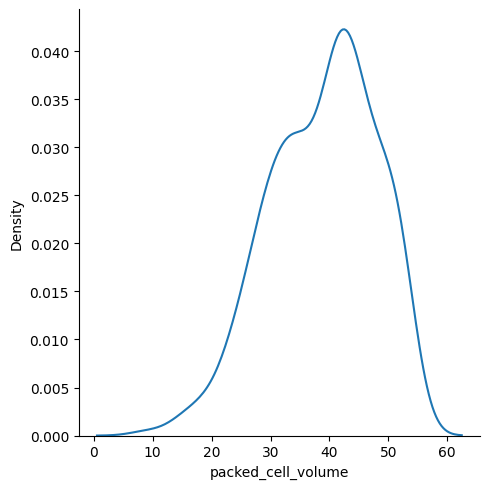

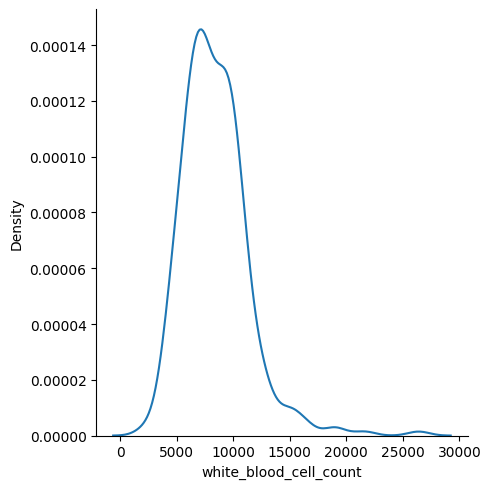

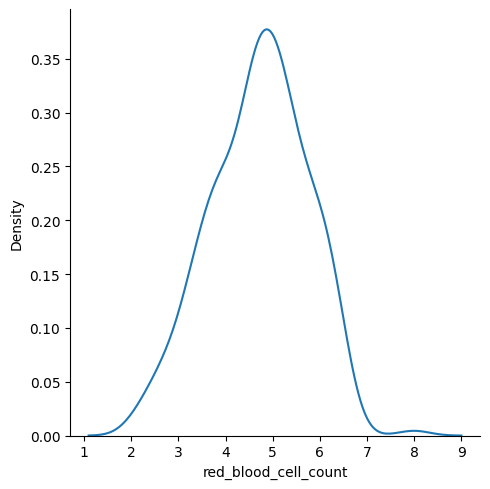

In [18]:
# checking numerical features distribution


plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
  sns.displot(chronic_df[col],kind='kde')





In [19]:
# let's see the cols in cat col list
cat_cols



['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

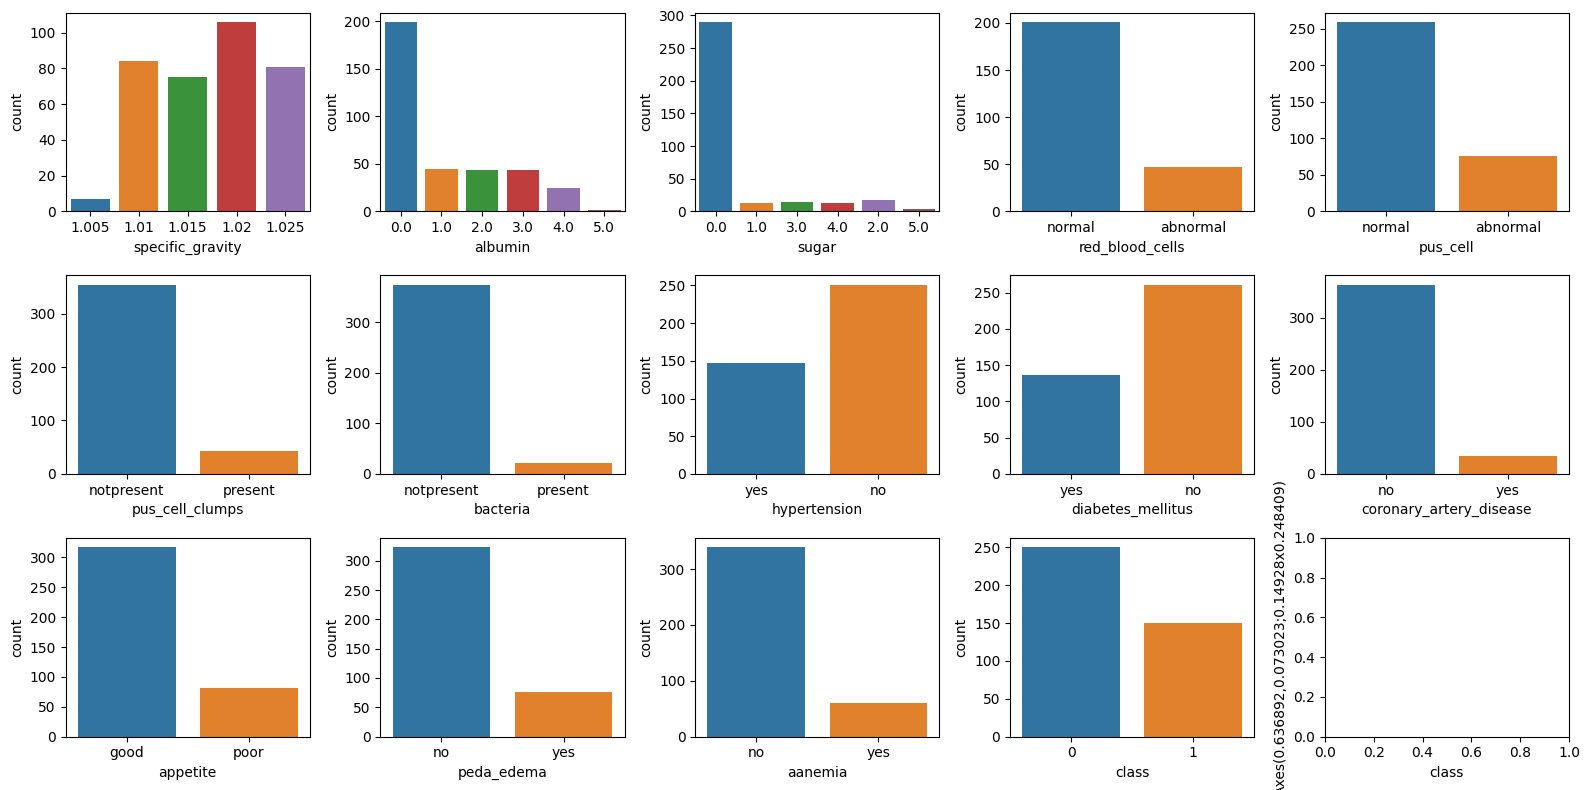

In [20]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col,ax in zip(cat_cols,axes):
  sns.countplot(data=chronic_df,x=col,ax=ax)
  plt.xlabel(col)
  plt.ylabel(ax)
  fig.tight_layout()








<ipython-input-21-e5ba48e51210>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(chronic_df.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

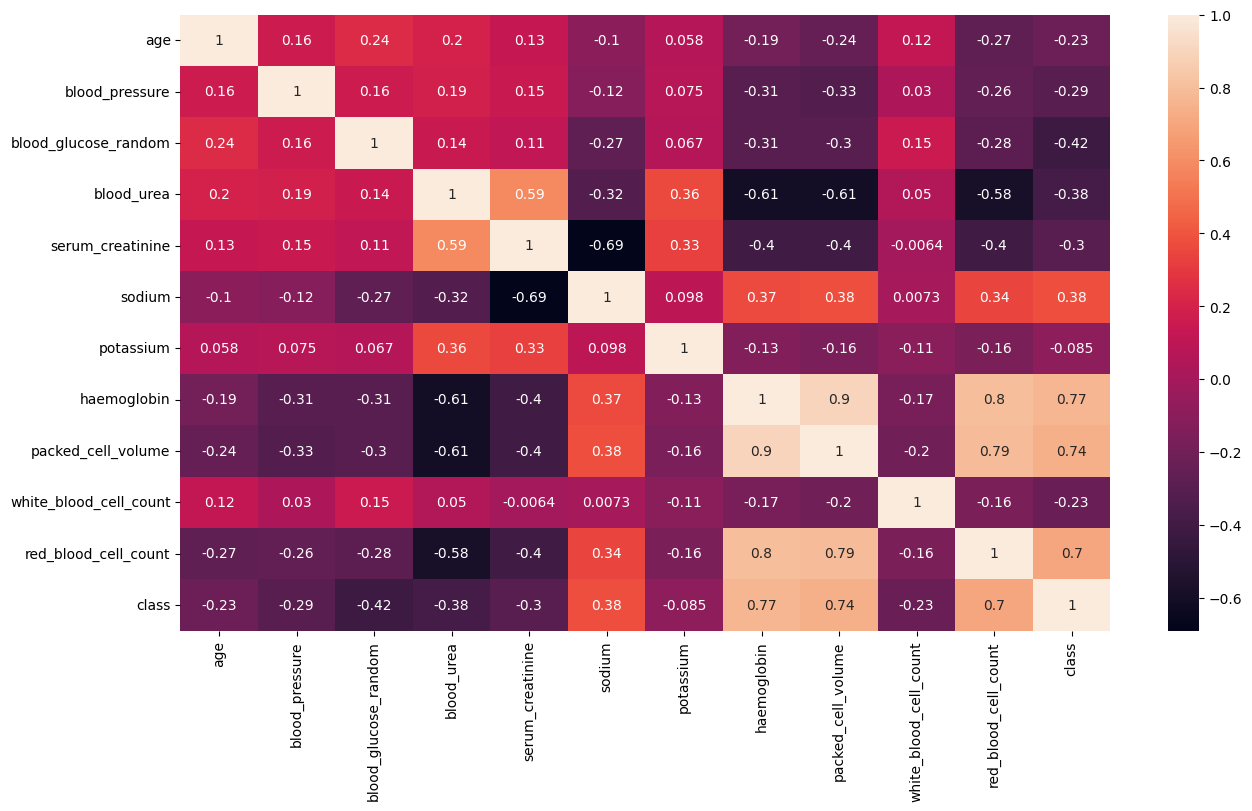

In [21]:
# correlated heatmap of data

plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(),annot=True)
plt.show







In [22]:
# let's check count of null values in whole df


chronic_df.isna().sum().sort_values(ascending=False)


red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [23]:
# let's check count of null values in num_cols

chronic_df[num_cols].isna().sum().sort_values(ascending=False)


red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [24]:
# let's check count of null values in cat cols
chronic_df[cat_cols].isna().sum().sort_values(ascending=False)




red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [29]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample

# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [30]:
# filling num_cols null values using random sampling method
for col in num_cols:
  random_value_imputation(col)




In [32]:
# let's check count of null values in num_cols again


chronic_df[num_cols].isna().sum().sort_values(ascending=False)


age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [33]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')






In [34]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isna().sum().sort_values(ascending=False)



sugar                      49
specific_gravity           47
albumin                    46
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
peda_edema                  1
aanemia                     1
red_blood_cells             0
pus_cell                    0
class                       0
dtype: int64

In [35]:
# filling cat null values with mode treatment

for col in cat_cols:
  impute_mode(col)


In [36]:
# check unique values in each cat col by looping over cat cols

for col in cat_cols:
  print(f"{col} has {chronic_df[col].nunique()} categories")





specific_gravity has 5 categories
albumin has 6 categories
sugar has 6 categories
red_blood_cells has 2 categories
pus_cell has 2 categories
pus_cell_clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes_mellitus has 2 categories
coronary_artery_disease has 2 categories
appetite has 2 categories
peda_edema has 2 categories
aanemia has 2 categories
class has 2 categories


In [ ]:
chronic_df.head()

In [39]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] = le.fit_transform(chronic_df[col])

In [40]:
# check chronic df after transforming cat cols

chronic_df.head()



,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,107.0,...,38.0,6000.0,6.3,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [42]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class',axis=1)
y = chronic_df['class']




In [45]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)





## **`Model Building`**

In [46]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


knn = KNeighborsClassifier()
knn.fit(X_train,y_train)





# accuracy score, confusion matrix and classification report of knn

knn_acc =accuracy_score(y_test,knn.predict(X_test))

print(f"training accuracy of knn is {accuracy_score(y_train,knn.predict(X_train))}")
print(f"test accuracy of knn is {knn_acc} \n")

print(f" confusion matrix : \n{confusion_matrix(y_test,knn.predict(X_test))}\n")
print(f"classification report : \n{classification_report(y_test,knn.predict(X_test))}")







training accuracy of knn is 0.7928571428571428
test accuracy of knn is 0.725 

 confusion matrix : 
[[54 18]
 [15 33]]

classification report : 
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        72
           1       0.65      0.69      0.67        48

    accuracy                           0.73       120
   macro avg       0.71      0.72      0.72       120
weighted avg       0.73      0.72      0.73       120



In [48]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)



# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test,dtc.predict(X_test))

print(f"training accuracy of dtc is {accuracy_score(y_train,dtc.predict(X_train))}")
print(f"test accuracy of dtc is {dtc_acc} \n")

print(f" confusion matrix : \n{confusion_matrix(y_test,dtc.predict(X_test))}\n")
print(f"classification report : \n{classification_report(y_test,dtc.predict(X_test))}")





training accuracy of dtc is 1.0
test accuracy of dtc is 0.975 

 confusion matrix : 
[[72  0]
 [ 3 45]]

classification report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [50]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

"""
Use this param
 {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

"""

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}


# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(dtc,grid_param,cv=5,n_jobs=-1,verbose=1)

grid_search_dtc.fit(X_train,y_train)






Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [51]:
# print best parameters and best score in grid search dtc

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)





{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9928571428571429


In [52]:
# storing best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test,dtc.predict(X_test))

print(f"training accuracy of dtc is {accuracy_score(y_train,dtc.predict(X_train))}")
print(f"test accuracy of dtc is {dtc_acc} \n")

print(f" confusion matrix : \n{confusion_matrix(y_test,dtc.predict(X_test))}\n")
print(f"classification report : \n{classification_report(y_test,dtc.predict(X_test))}")











training accuracy of dtc is 0.9964285714285714
test accuracy of dtc is 0.9666666666666667 

 confusion matrix : 
[[72  0]
 [ 4 44]]

classification report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [54]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion='entropy',max_depth=11,max_features='auto',min_samples_leaf=2,min_samples_split=3,n_estimators=130)
rd_clf.fit(X_train,y_train)



# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test,rd_clf.predict(X_test))

print(f"training accuracy of rd_clf is {accuracy_score(y_train,rd_clf.predict(X_train))}")
print(f"test accuracy of rd_clf is {rd_clf_acc} \n")

print(f" confusion matrix : \n{confusion_matrix(y_test,rd_clf.predict(X_test))}\n")
print(f"classification report : \n{classification_report(y_test,rd_clf.predict(X_test))}")






/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


training accuracy of rd_clf is 1.0
test accuracy of rd_clf is 0.975 

 confusion matrix : 
[[72  0]
 [ 3 45]]

classification report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [57]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_train,y_train)


# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test,ada.predict(X_test))

print(f"training accuracy of ada is {accuracy_score(y_train,ada.predict(X_train))}")
print(f"test accuracy of ada is {ada_acc} \n")

print(f" confusion matrix : \n{confusion_matrix(y_test,ada.predict(X_test))}\n")
print(f"classification report : \n{classification_report(y_test,ada.predict(X_test))}")










training accuracy of ada is 1.0
test accuracy of ada is 0.975 

 confusion matrix : 
[[72  0]
 [ 3 45]]

classification report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb =


# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc =







In [ ]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
sgb =




# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc =








In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier

xgb =


# accuracy score, confusion matrix and classification report of xgboost

xgb_acc =










In [ ]:
# pip install catboost

In [ ]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

cat =


# accuracy score, confusion matrix and classification report of cat boost

cat_acc =








In [ ]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc =




# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc =









In [ ]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

lgbm =




# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc =






In [ ]:
# comparing all models accuracy by creating a df
models =








